# Data Exploration

In [1]:
from os import listdir
from os.path import join
import pandas as pd
import numpy as np
import mne
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import sys
sys.path.append("../")

from utils import load_eeg_data

In [3]:

DATA_ROOT_PATH = "../data"
df = load_eeg_data(DATA_ROOT_PATH)

In [22]:
# Combine all the data
df = pd.concat([pd.read_csv(data_file, index_col=0) for data_file in DATA_FULL_PATH], ignore_index=True)

In [23]:
len(df)

945

In [24]:
# There are a lot of columns
print(list(df.columns))

['no.', 'sex', 'age', 'eeg.date', 'education', 'IQ', 'main.disorder', 'specific.disorder', 'AB.A.delta.a.FP1', 'AB.A.delta.b.FP2', 'AB.A.delta.c.F7', 'AB.A.delta.d.F3', 'AB.A.delta.e.Fz', 'AB.A.delta.f.F4', 'AB.A.delta.g.F8', 'AB.A.delta.h.T3', 'AB.A.delta.i.C3', 'AB.A.delta.j.Cz', 'AB.A.delta.k.C4', 'AB.A.delta.l.T4', 'AB.A.delta.m.T5', 'AB.A.delta.n.P3', 'AB.A.delta.o.Pz', 'AB.A.delta.p.P4', 'AB.A.delta.q.T6', 'AB.A.delta.r.O1', 'AB.A.delta.s.O2', 'AB.B.theta.a.FP1', 'AB.B.theta.b.FP2', 'AB.B.theta.c.F7', 'AB.B.theta.d.F3', 'AB.B.theta.e.Fz', 'AB.B.theta.f.F4', 'AB.B.theta.g.F8', 'AB.B.theta.h.T3', 'AB.B.theta.i.C3', 'AB.B.theta.j.Cz', 'AB.B.theta.k.C4', 'AB.B.theta.l.T4', 'AB.B.theta.m.T5', 'AB.B.theta.n.P3', 'AB.B.theta.o.Pz', 'AB.B.theta.p.P4', 'AB.B.theta.q.T6', 'AB.B.theta.r.O1', 'AB.B.theta.s.O2', 'AB.C.alpha.a.FP1', 'AB.C.alpha.b.FP2', 'AB.C.alpha.c.F7', 'AB.C.alpha.d.F3', 'AB.C.alpha.e.Fz', 'AB.C.alpha.f.F4', 'AB.C.alpha.g.F8', 'AB.C.alpha.h.T3', 'AB.C.alpha.i.C3', 'AB.C.alph

In [25]:
deltadf = df.loc[:, 'AB.A.delta.a.FP1':'AB.A.delta.s.O2']
thetadf = df.loc[:, 'AB.B.theta.a.FP1':'AB.B.theta.s.O2']
alphadf = df.loc[:, 'AB.C.alpha.a.FP1':'AB.C.alpha.s.O2']
betadf = df.loc[:, 'AB.D.beta.a.FP1':'AB.D.beta.s.O2']
highbetadf = df.loc[:, 'AB.E.highbeta.a.FP1':'AB.E.highbeta.s.O2']
gammadf = df.loc[:, 'AB.F.gamma.a.FP1':'AB.F.gamma.s.O2']
cohwaves = df.loc[:, 'COH.A.delta.a.FP1.b.FP2':'COH.F.gamma.r.O1.s.O2']
deltadf.head(5)

,AB.A.delta.a.FP1,AB.A.delta.b.FP2,AB.A.delta.c.F7,AB.A.delta.d.F3,AB.A.delta.e.Fz,AB.A.delta.f.F4,AB.A.delta.g.F8,AB.A.delta.h.T3,AB.A.delta.i.C3,AB.A.delta.j.Cz,AB.A.delta.k.C4,AB.A.delta.l.T4,AB.A.delta.m.T5,AB.A.delta.n.P3,AB.A.delta.o.Pz,AB.A.delta.p.P4,AB.A.delta.q.T6,AB.A.delta.r.O1,AB.A.delta.s.O2
0,26.786022,29.005792,14.575594,25.596834,29.356257,26.155650,18.475137,9.452226,21.881695,24.623831,21.269257,7.490767,7.333116,16.162961,19.282846,16.231322,8.838428,4.004268,7.218891
1,26.786022,29.005792,14.575594,25.596834,29.356257,26.155650,18.475137,9.452226,21.881695,24.623831,21.269257,7.490767,7.333116,16.162961,19.282846,16.231322,8.838428,4.004268,7.218891
2,22.082934,25.579175,9.757975,19.741808,29.703496,22.259028,10.901788,4.889309,22.010553,22.249035,17.166742,6.263826,7.624944,9.824998,16.156713,13.358209,8.984010,7.640078,5.229589
3,26.688599,29.093663,14.439514,24.749086,35.375717,27.299735,16.237472,13.533163,22.076823,31.403006,21.555135,9.969829,12.933585,15.708698,24.651893,21.923421,16.965152,20.291675,25.660625
4,9.336465,9.056702,9.644113,10.479685,10.643856,9.646060,7.495992,6.630536,8.801331,10.288895,8.257286,5.742282,4.622575,6.622582,6.886937,5.195904,2.917377,2.672469,2.098540


In [28]:
standard_montage = mne.channels.make_standard_montage('standard_primed')
n_channels = len(standard_montage.ch_names)

In [30]:
print(standard_montage.ch_names)

['Fp1', 'Fpz', 'Fp2', "F7'", "F5'", "F3'", "F1'", "Fz'", "F2'", "F4'", "F6'", "F8'", 'F7', 'F5', 'F3', 'F1', 'Fz', 'F2', 'F4', 'F6', 'F8', "F7''", "F5''", "F3''", "F1''", "Fz''", "F2''", "F4''", "F6''", "F8''", 'T1', "T3'", "C5'", "C3'", "C1'", "Cz'", "C2'", "C4'", "C6'", "T4'", 'T2', 'T3', 'C5', 'C3', 'C1', 'Cz', 'C2', 'C4', 'C6', 'T4', "T3''", "C5''", "C3''", "C1''", "Cz''", "C2''", "C4''", "C6''", "T4''", "T5'", "P5'", "P3'", "P1'", "Pz'", "P2'", "P4'", "P6'", "T6'", "Cb1'", 'T5', 'P5', 'P3', 'P1', 'Pz', 'P2', 'P4', 'P6', 'T6', "Cb2'", 'Cb1', "O1'", "P5''", "P3''", "P1''", "Pz''", "P2''", "P4''", "P6''", "O2'", 'Cb2', 'O1', 'Oz', 'O2', "Cb1''", 'Iz', "Cb2''", 'M1', 'M2', 'A1', 'A2']


In [31]:
d=deltadf.rename(columns = lambda x : str(x)[13:])
d.head()

,FP1,FP2,F7,F3,Fz,F4,F8,T3,C3,Cz,C4,T4,T5,P3,Pz,P4,T6,O1,O2
0,26.786022,29.005792,14.575594,25.596834,29.356257,26.155650,18.475137,9.452226,21.881695,24.623831,21.269257,7.490767,7.333116,16.162961,19.282846,16.231322,8.838428,4.004268,7.218891
1,26.786022,29.005792,14.575594,25.596834,29.356257,26.155650,18.475137,9.452226,21.881695,24.623831,21.269257,7.490767,7.333116,16.162961,19.282846,16.231322,8.838428,4.004268,7.218891
2,22.082934,25.579175,9.757975,19.741808,29.703496,22.259028,10.901788,4.889309,22.010553,22.249035,17.166742,6.263826,7.624944,9.824998,16.156713,13.358209,8.984010,7.640078,5.229589
3,26.688599,29.093663,14.439514,24.749086,35.375717,27.299735,16.237472,13.533163,22.076823,31.403006,21.555135,9.969829,12.933585,15.708698,24.651893,21.923421,16.965152,20.291675,25.660625
4,9.336465,9.056702,9.644113,10.479685,10.643856,9.646060,7.495992,6.630536,8.801331,10.288895,8.257286,5.742282,4.622575,6.622582,6.886937,5.195904,2.917377,2.672469,2.098540


In [36]:
test = d.iloc[[0]].T
testcols = list(d.columns)

In [34]:
info = mne.create_info(ch_names=testcols, sfreq=128, ch_types='eeg')

In [35]:
info

<Info | 7 non-empty values
 bads: []
 ch_names: FP1, FP2, F7, F3, Fz, F4, F8, T3, C3, Cz, C4, T4, T5, P3, Pz, ...
 chs: 19 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 64.0 Hz
 meas_date: unspecified
 nchan: 19
 projs: []
 sfreq: 128.0 Hz
>

In [37]:
evoked = mne.EvokedArray(test, info)
evoked.set_montage(standard_montage, on_missing='warn', match_case=False)

<Evoked | '' (average, N=1), 0 – 0 sec, baseline off, 19 ch, ~32 kB>

In [40]:
# first we obtain the 3d positions of selected channels
chs = ['O1', 'O2', 'FP1', 'FP2','T3','T4','Cz']
# when the montage is set, it is transformed to the "head" coordinate frame
# that MNE uses internally, therefore we need to use
# ``fake_evoked.get_montage()`` to get these properly transformed coordinates
montage_head = evoked.get_montage()
ch_pos = montage_head.get_positions()['ch_pos']
pos = np.stack([ch_pos[ch] for ch in chs])

oz = (pos[0, 0]*pos[1, 0])/2
fpz = (pos[2,0]*pos[3,0])/2
tz = (pos[5,0]*pos[6,0])/2
# now we calculate the radius from T7 and T8 x position
# (we could use Oz and Fpz y positions as well)
#radius =np.abs(pos[[4, 5], 0]).mean()-(pos[6, 0])
radius = 0.09494
# then we obtain the x, y, z sphere center this way:
# x: x position of the O1 and O2 channel (should be very close to 0)
# y: y position of the T3 and T4 channel (should be very close to 0 too)
# z: average z position of Oz, Fpz, T7 and T8 (their z position should be the
#    the same, so we could also use just one of these channels), it should be
#    positive and somewhere around `0.03` (3 cm)
x = oz
y = fpz
z = tz
#x = pos[0, 0]
#y = pos[-1, 1]
#z = pos[:, -1].mean()
# lets print the values we got:
print([f'{v:0.5f}' for v in [x, y, z, radius]])

['-0.00044', '-0.00044', '-0.00006', '0.09494']


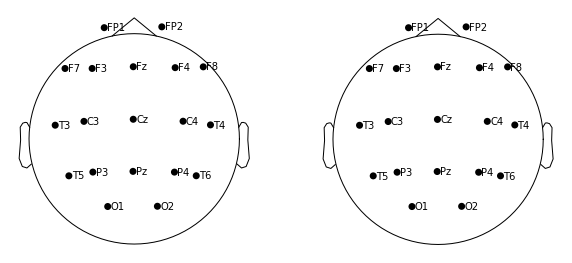

Text(0.5, 1.0, 'EEGLAB channel projection')

In [46]:
# create a two-panel figure with some space for the titles at the top
fig, ax = plt.subplots(ncols=2, figsize=(10, 6), gridspec_kw=dict(top=1),
                       sharex=True, sharey=True)

# we plot the channel positions with default sphere - the mne way
evoked.plot_sensors(axes=ax[0], show=False, show_names = True)

# in the second panel we plot the positions using the EEGLAB reference sphere
evoked.plot_sensors(sphere=(x, y, z, radius), axes=ax[1], show_names = True)

# add titles
ax[0].set_title('MNE channel projection', fontweight='bold')
ax[1].set_title('EEGLAB channel projection', fontweight='bold')

Text(0.5, 1.0, 'EEGLAB')

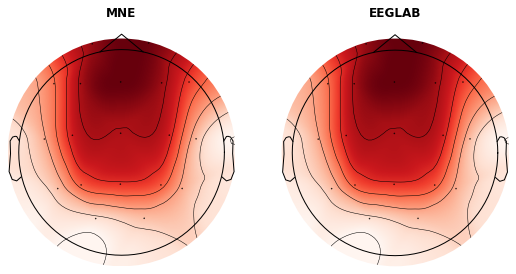

In [44]:
fig, ax = plt.subplots(ncols=2, figsize=(9, 4), gridspec_kw=dict(top=1),
                       sharex=True, sharey=True)

mne.viz.plot_topomap(evoked.data[:, 0], evoked.info, axes=ax[0],
                     show=False)
mne.viz.plot_topomap(evoked.data[:, 0], evoked.info, axes=ax[1],
                     show=False, sphere=(x, y, z, radius))

# add titles
ax[0].set_title('MNE', fontweight='bold')
ax[1].set_title('EEGLAB', fontweight='bold')